KNN Classification

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
n_neighbors = 25

In [ ]:
data=pd.read_csv('train.csv')
data.columns
data

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0
...,...,...,...,...,...,...,...,...
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0


In [ ]:
x=data.iloc[:,[3,4,7]].values
y=data.iloc[:,6].values
print(x)
print(y)

[[ 33.      65.       0.    ]
 [ 33.      65.       0.    ]
 [ 33.      65.       0.    ]
 ...
 [-15.4167  28.2833   0.    ]
 [-15.4167  28.2833   0.    ]
 [-15.4167  28.2833   0.    ]]
[0. 0. 0. ... 3. 3. 3.]


In [ ]:
# splitting training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=0)
# for checking the values
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 11.8251  42.5903   0.    ]
 [  9.9456  -9.6966   0.    ]
 [ 44.682  -63.7443   0.    ]
 ...
 [-12.8275  45.1662   0.    ]
 [ 60.472    8.4689   0.    ]
 [ 52.9399 -73.5491   0.    ]]
[[  9.082    8.6753   0.    ]
 [ 23.685   90.3563   0.    ]
 [ 39.0639 -76.8021   0.    ]
 ...
 [ -6.369   34.8888   0.    ]
 [ 41.9029  12.4534   0.    ]
 [ 29.5     47.75     0.    ]]
[0. 0. 0. ... 0. 0. 0.]
[ 0.  0. 32. ...  0.  1. 80.]


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x)
print(y)

[[ 33.      65.       0.    ]
 [ 33.      65.       0.    ]
 [ 33.      65.       0.    ]
 ...
 [-15.4167  28.2833   0.    ]
 [-15.4167  28.2833   0.    ]
 [-15.4167  28.2833   0.    ]]
[0. 0. 0. ... 3. 3. 3.]


In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print(y_pred)
print(y_test)

[0. 0. 0. ... 0. 0. 0.]
[ 0.  0. 32. ...  0.  1. 80.]


In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

0.6248137108792846


In [ ]:
pr=metrics.precision_score(y_test,y_pred,average='weighted') # you can add micro,macro and weighted from anyone of these choose and put in average=''
print(pr)

0.39039217330274223


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
t1=sc.transform([[56.0000,28.6743,0.8]])
pt1=clf.predict(t1)
pt1

array([0.])

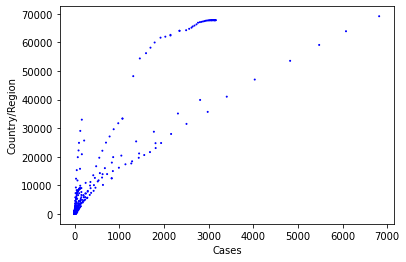

In [ ]:
my_color=np.where(y==1, 'green', 'blue')
plt.scatter(data.loc[:,'Fatalities'],data.loc[:,'ConfirmedCases'],color=my_color , s=1, alpha=1)
plt.xlabel('Cases')
plt.ylabel('Country/Region')
plt.show()